In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from statsmodels.tsa.seasonal import seasonal_decompose

import os
import csv

ModuleNotFoundError: No module named 'statsmodels'

In [2]:
# Go to repository root directory
if "_changed_dir" not in locals():
    os.chdir("../")
    _changed_dir = True

In [3]:
#Parameters
csv_name = "no2_by_pua.csv"
data_dir = os.path.join("data", "processed")

#Mapping for MET Office names to short names
quantity_map= {
    "mean_mass_concentration_of_nitrogen_dioxide_in_air": "Average NO2", 
    "mean_mass_concentration_of_sulphur_dioxide_in_air" : "Average SO2"
}

In [4]:
csv_path = os.path.join(data_dir, csv_name)

In [5]:
#Get meta information (contained in the first two lines of the .csv)
with open(csv_path, newline='') as csvfile:
    csv_reader = csv.reader(csvfile, delimiter=',')
    quantity_list = next(csv_reader)
    unit_list     = next(csv_reader)
    
quantity = quantity_list[1]
units    = unit_list[1]

In [6]:
df       = pd.read_csv(csv_path, skiprows = 2)
df.index = pd.to_datetime(df.index, format='%d/%m/%Y %H:%M:%S')
df.head(10)

,Aberdeen,Blackburn,Bradford,Bournemouth,Birmingham,Brighton,Bristol,Burnley,Barnsley,Cambridge,...,Basildon,Telford,Middlesbrough,Warrington,Wakefield,Birkenhead,Wigan,Worthing,York,Belfast
2020-01-01 01:00:00,16.2139,19.2473,26.6197,3.6983,31.4529,26.6833,23.3387,22.6845,21.3241,25.760,...,31.2209,25.5168,16.4845,21.0130,23.7295,24.4133,21.0831,22.3176,18.3846,23.2418
2020-01-01 02:00:00,7.5519,19.5873,23.5472,3.8610,29.0946,24.5759,18.8427,20.8691,20.8517,27.040,...,28.1512,25.7446,15.5798,22.0246,22.3991,26.0200,21.7944,16.8941,16.6231,18.0443
2020-01-01 03:00:00,8.4190,18.6236,20.3268,4.4901,28.8669,20.3074,13.9095,17.7845,21.0845,29.270,...,24.9419,25.9188,15.0637,21.4739,21.8866,25.9011,20.9563,11.8941,15.5451,17.0338
2020-01-01 04:00:00,11.0785,19.8018,18.5220,5.9273,29.1101,13.5037,13.2759,17.2216,21.7612,29.300,...,22.7000,26.7921,15.6244,22.4565,22.3554,26.1800,22.2239,7.4529,16.2165,15.3209
2020-01-01 05:00:00,10.4038,21.6382,18.4205,7.7977,28.1463,10.8074,13.1016,18.3691,23.0147,26.705,...,22.2163,25.7812,14.7506,24.0609,23.5393,27.4800,24.2211,7.3529,17.5813,14.2303
2020-01-01 06:00:00,17.6810,24.6018,20.7772,11.3006,28.6214,10.9204,14.8897,21.1113,25.8129,25.305,...,23.4860,25.7000,14.2256,27.3522,26.5411,29.4189,27.6127,8.5176,19.3451,16.1761
2020-01-01 07:00:00,21.2165,29.7873,25.9795,15.8488,30.5179,14.6611,18.8379,25.6907,30.7586,24.660,...,26.0860,26.7891,16.9810,32.2348,32.2429,30.7189,32.6197,12.4529,22.6560,19.3547
2020-01-01 08:00:00,22.6038,36.4291,31.7268,20.1686,31.8751,18.4074,23.9170,31.9948,33.6147,24.770,...,27.7209,28.0693,23.8280,36.3304,36.8125,34.3100,37.6394,17.1941,29.1176,25.4607
2020-01-01 09:00:00,21.8557,39.7636,35.6008,20.4343,32.9058,20.0778,26.0747,36.4639,33.5121,24.035,...,28.0372,28.4168,27.0065,37.5319,37.5375,35.9711,39.0282,19.3529,33.0857,29.9318
2020-01-01 10:00:00,24.7734,37.1018,35.5189,17.4203,31.6840,21.0111,26.0901,35.4041,32.8121,23.680,...,27.2953,24.9297,30.6220,34.5000,35.5455,32.0467,35.8085,19.3059,34.1506,33.4139


In [7]:
#Get 'pretty' quantity names
quantity_name = [v for k, v in quantity_map.items() if k == quantity]
quantity_name = quantity_name[0]

## Plot the hourly variation for each PUA

Text(0, 0.5, 'Average NO2 [ug/m3]')

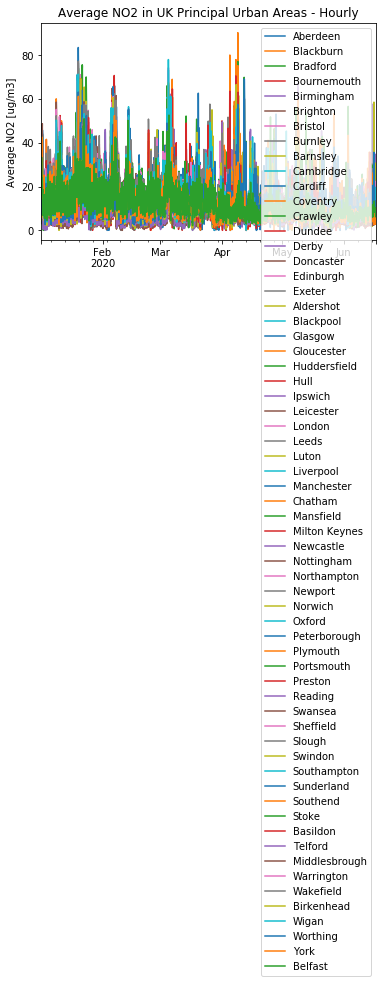

In [8]:
ax = df.plot()
ax.set_title(f"{quantity_name} in UK Principal Urban Areas - Hourly")
ax.set_ylabel(f"{quantity_name} [{units}]")

## Apply Rolling Average

Text(0, 0.5, 'Average NO2 [ug/m3]')

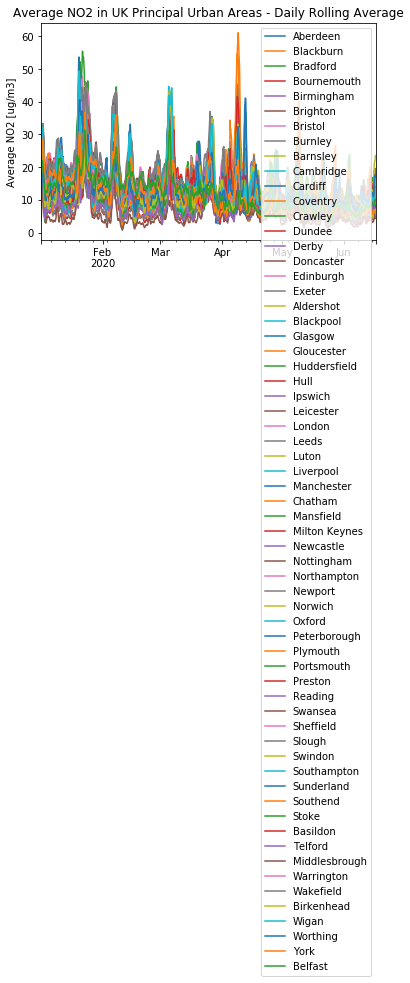

In [9]:
ax = df.rolling('1D').mean().plot()
ax.set_title(f"{quantity_name} in UK Principal Urban Areas - Daily Rolling Average")
ax.set_ylabel(f"{quantity_name} [{units}]")

Text(0, 0.5, 'Average NO2 [ug/m3]')

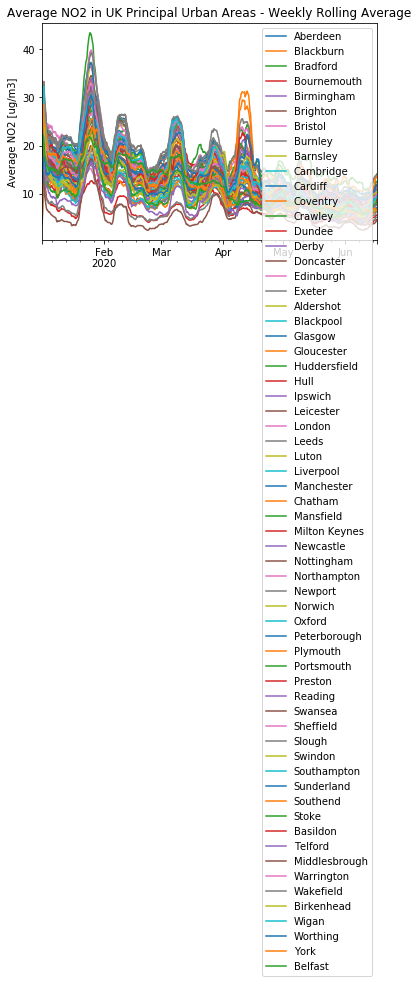

In [10]:
ax = df.rolling('7D').mean().plot()
ax.set_title(f"{quantity_name} in UK Principal Urban Areas - Weekly Rolling Average")
ax.set_ylabel(f"{quantity_name} [{units}]")

In [17]:
df_max = df.max(axis=1)
df_min = df.min(axis=1)

Text(0, 0.5, 'Average NO2 [ug/m3]')

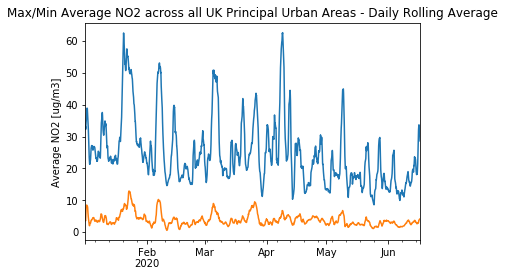

In [23]:
ax = df_max.rolling('1D').mean().plot(label='Maximum {} concentration')
ax = df_min.rolling('1D').mean().plot(label='Minimum {} concentration')
ax.set_title(f"Max/Min {quantity_name} across all UK Principal Urban Areas - Daily Rolling Average")
ax.set_ylabel(f"{quantity_name} [{units}]")

In [20]:
seas_freq_val = 7D
decomposition = seasonal_decompose(df.rolling('1D').mean(), period=seas_freq_val)
fig = decomposition.plot() # assign to variable to avoid double plotting
#fig.savefig(os.path.join(save_dir, f'seasonal_decomposition_{smooth_str}{img_fmt}'))

Text(3.200000000000003, 0.5, 'Average NO2 [ug/m3]')